In [156]:
import pandas as pd
import numpy as np

# Import Data
detailed_transactions_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/all_transactions_data.csv')
transactions = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_transactions_df.csv')
checkings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_checkings_df.csv')
savings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_savings_df.csv')
credit = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_credit_df.csv')

In [157]:
transactions.shape

(664, 19)

In [158]:
pd.set_option('display.max_columns', 63)
transactions.head(20)

,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
0,1362480,1,15,20,1,25,0,1,2,12,23,12,13,32,26.182107,378.28,1254.83,1807.71,2185.99
1,1362484,1,38,30,0,0,0,3,13,15,15,12,10,50,18.816515,33.08,1847.77,302.31,335.39
2,1362485,7,50,16,0,23,0,0,1,0,19,12,13,30,5.223484,56.93,-1009.03,-981.91,-925.52
3,1362486,0,0,5,0,0,0,0,0,24,3,0,5,13,29.791667,57.20,3428.51,-1165.56,-1108.36
4,1362487,3,23,3,0,0,0,12,0,19,12,4,6,21,21.713894,51.12,-134.13,-3603.25,-3553.12
5,1362488,0,0,10,0,0,0,7,1,7,25,0,6,43,3.193878,19.63,162.42,-4132.15,-4112.52
6,1362489,0,24,16,1,22,0,6,1,18,17,9,10,32,26.083633,258.36,479.08,341.26,599.62
7,1362492,1,24,16,0,0,0,3,2,8,20,4,18,34,6.736054,69.54,-1417.18,-6550.77,-6481.68
8,1362496,0,0,0,0,0,0,0,0,12,0,0,0,0,30.363636,3.72,251.06,0.00,3.72
9,1362497,0,0,8,0,0,0,0,0,12,2,0,5,10,9.972222,4.27,10.86,-566.36,-562.09


In [159]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import Scaler
from sklearn.preprocessing import StandardScaler

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# import colour map
import matplotlib.cm as cm

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

## K-Means clustering with elbow plot to determine optimal number of clusters

#### Step 1: Extract Variables for Clustering

In [160]:
# Extract the variables for clustering (principle amount, interest amount, new balance, transaction amount)
X = transactions.iloc[:, [15, 16, 17, 18]].values

#### Step 2: Normalize the variables to have zero mean and unit variance

In [161]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

#### Step 3: Choose the number of clusters you want to create (Create Elbow Plot)

In [162]:
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)


#### Step 4: Create a plot of the SSE values vs. the number of clusters:

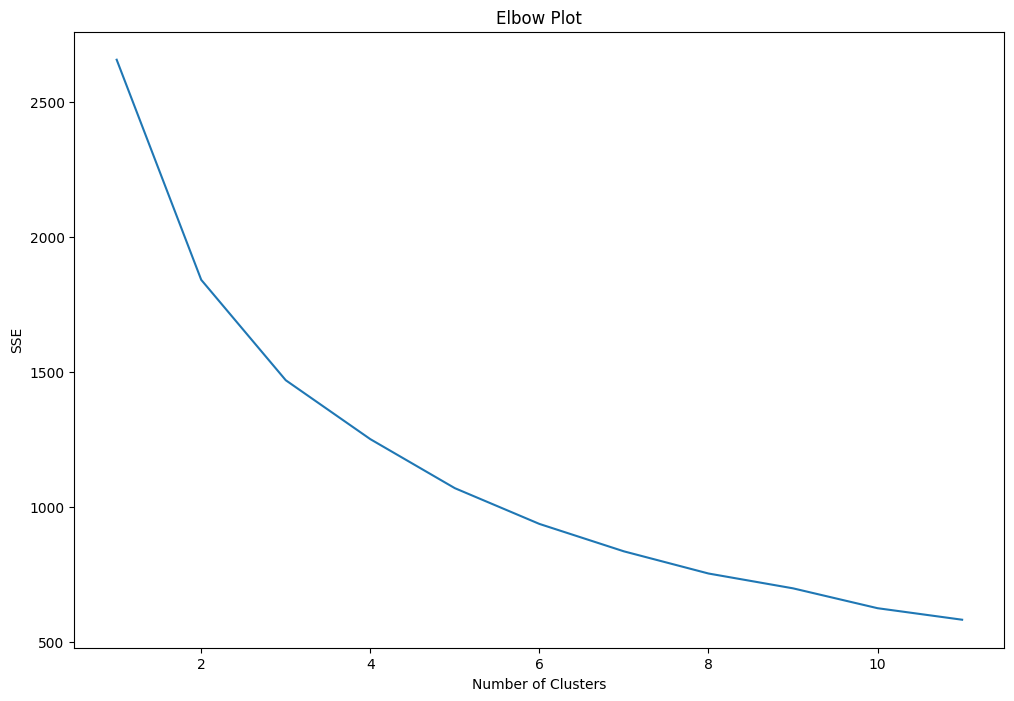

In [163]:
plt.plot(range(1, 12), sse)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [164]:
# Initialize the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# Fit the K-Means model to the dataset
kmeans.fit(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [165]:
# Predict the cluster labels for the dataset
y_kmeans = kmeans.predict(X)

#### Step 5: Visualise the clusters:

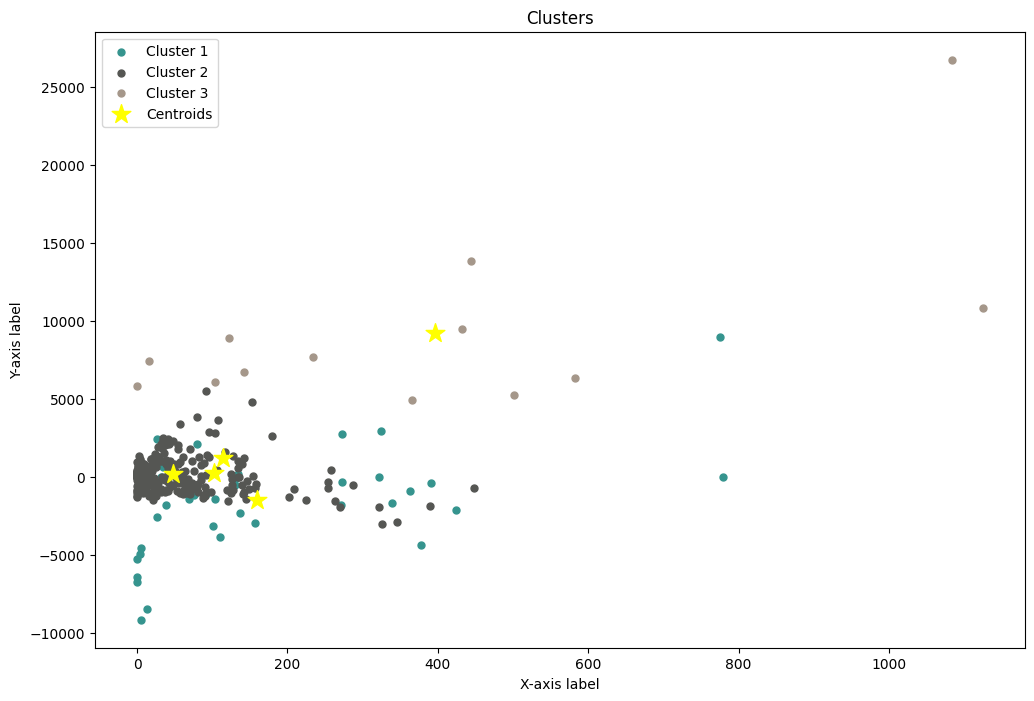

In [178]:
import matplotlib.pyplot as plt

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Plot the data points with different colors based on their cluster assignments
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=25, c='#35948e', label='Cluster 1')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=25, c='#555653', label='Cluster 2')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=25, c='#a5978a', label='Cluster 3')


# Plot the centroids as large markers
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='*', label='Centroids')

plt.title('Clusters')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.show()


In [145]:
model = KMeans(n_clusters=3)
model.fit(X)

cluster_labels = model.predict(X)

transactions_clusters = transactions.copy()
transactions_clusters['cluster'] = cluster_labels
transactions_clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt,cluster
0,1362480,1,15,20,1,25,0,1,2,12,23,12,13,32,26.182107,378.28,1254.83,1807.71,2185.99,2
1,1362484,1,38,30,0,0,0,3,13,15,15,12,10,50,18.816515,33.08,1847.77,302.31,335.39,2
2,1362485,7,50,16,0,23,0,0,1,0,19,12,13,30,5.223484,56.93,-1009.03,-981.91,-925.52,2
3,1362486,0,0,5,0,0,0,0,0,24,3,0,5,13,29.791667,57.20,3428.51,-1165.56,-1108.36,2
4,1362487,3,23,3,0,0,0,12,0,19,12,4,6,21,21.713894,51.12,-134.13,-3603.25,-3553.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1363490,0,0,0,0,0,0,0,0,12,0,0,0,0,30.363636,34.24,2301.53,0.00,34.24,2
660,1363491,0,0,5,0,0,0,0,0,3,1,0,6,3,5.647059,1.26,17.82,-188.89,-187.63,2
661,1363492,1,14,11,0,25,0,5,0,12,26,12,14,33,29.748299,977.69,-5646.61,-3835.22,-2857.53,1
662,1363493,0,0,17,0,0,0,3,19,13,17,0,11,38,11.862812,38.12,2607.51,-3885.63,-3847.51,1


## Silhouette Analysis for Cluster

#### Step 1: Define the number of clusters you want to evaluate

In [214]:
k_range = range(2, 8)

#### Step 2: Iterate over the number of clusters and fit a KMeans model for each number

In [215]:
for n_clusters in k_range:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

#### Step 3: Calculate the silhouette score for each number of clusters

In [216]:
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 7 The average silhouette_score is : 0.4042635033189405


## Step 4: Calculate the silhouette score for each sample and plot the results:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

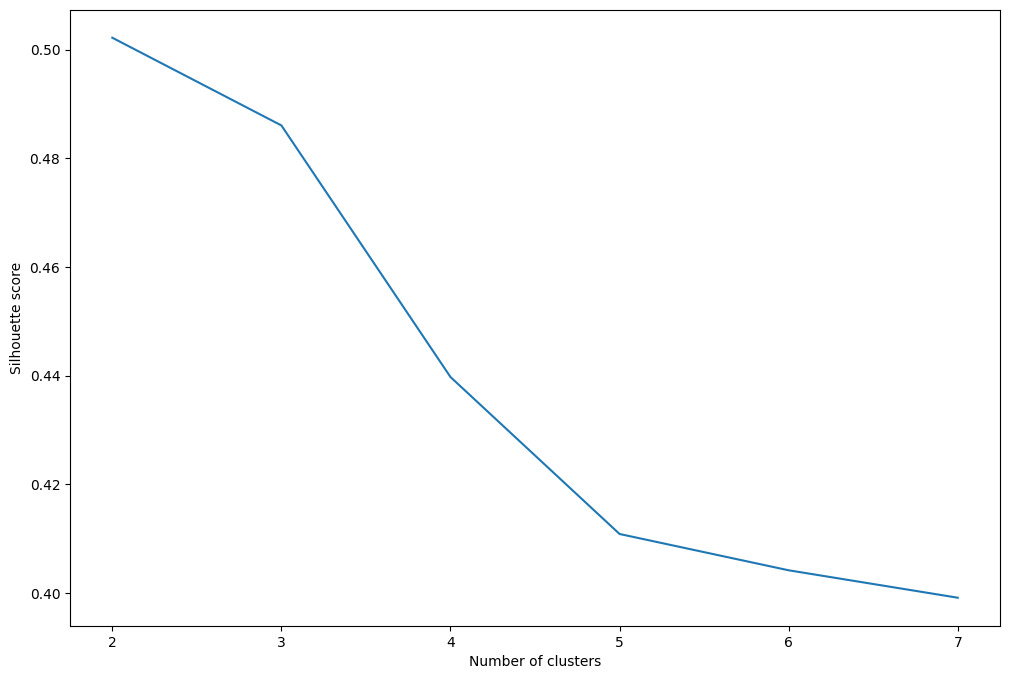

In [221]:
silhouette_scores = []
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for each number of clusters
plt.plot(range(2, 8), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

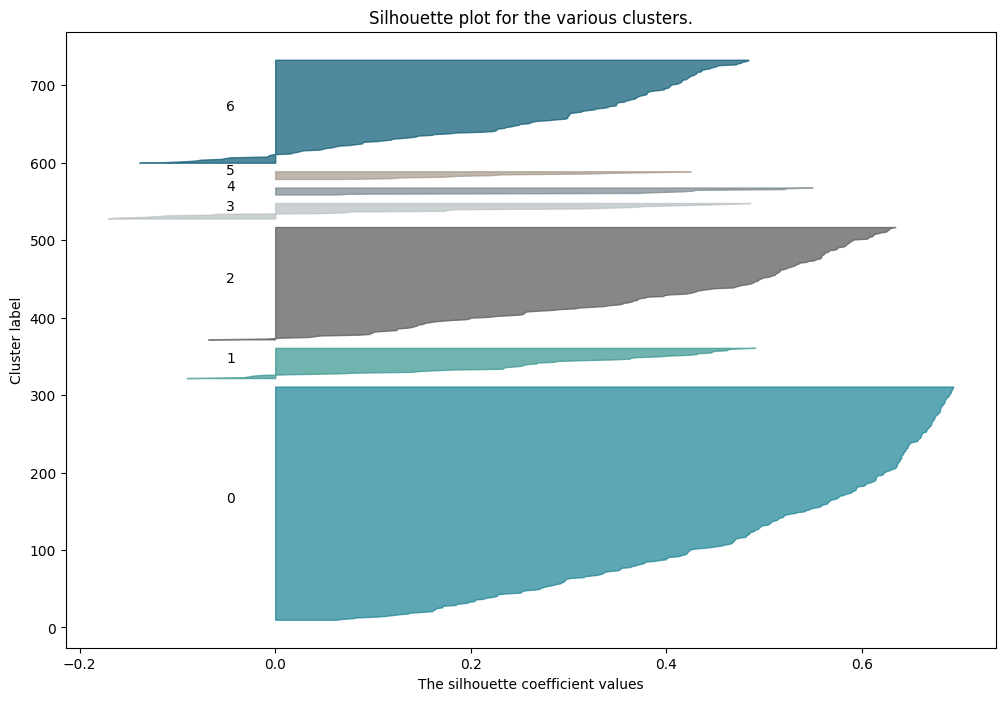

In [222]:
colors = ['#188193', '#35948e', '#555653', '#b7bfc3', '#79868d', '#a5978a', '#075773'] 

sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10

for i in range(7):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = colors[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt,cluster
0,1362480,1,15,20,1,25,0,1,2,12,23,12,13,32,26.182107,378.28,1254.83,1807.71,2185.99,0
1,1362484,1,38,30,0,0,0,3,13,15,15,12,10,50,18.816515,33.08,1847.77,302.31,335.39,0
2,1362485,7,50,16,0,23,0,0,1,0,19,12,13,30,5.223484,56.93,-1009.03,-981.91,-925.52,0
3,1362486,0,0,5,0,0,0,0,0,24,3,0,5,13,29.791667,57.20,3428.51,-1165.56,-1108.36,0
4,1362487,3,23,3,0,0,0,12,0,19,12,4,6,21,21.713894,51.12,-134.13,-3603.25,-3553.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1363490,0,0,0,0,0,0,0,0,12,0,0,0,0,30.363636,34.24,2301.53,0.00,34.24,0
660,1363491,0,0,5,0,0,0,0,0,3,1,0,6,3,5.647059,1.26,17.82,-188.89,-187.63,0
661,1363492,1,14,11,0,25,0,5,0,12,26,12,14,33,29.748299,977.69,-5646.61,-3835.22,-2857.53,1
662,1363493,0,0,17,0,0,0,3,19,13,17,0,11,38,11.862812,38.12,2607.51,-3885.63,-3847.51,1


# Cluster Two - Overall Transactions (All Variables) 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

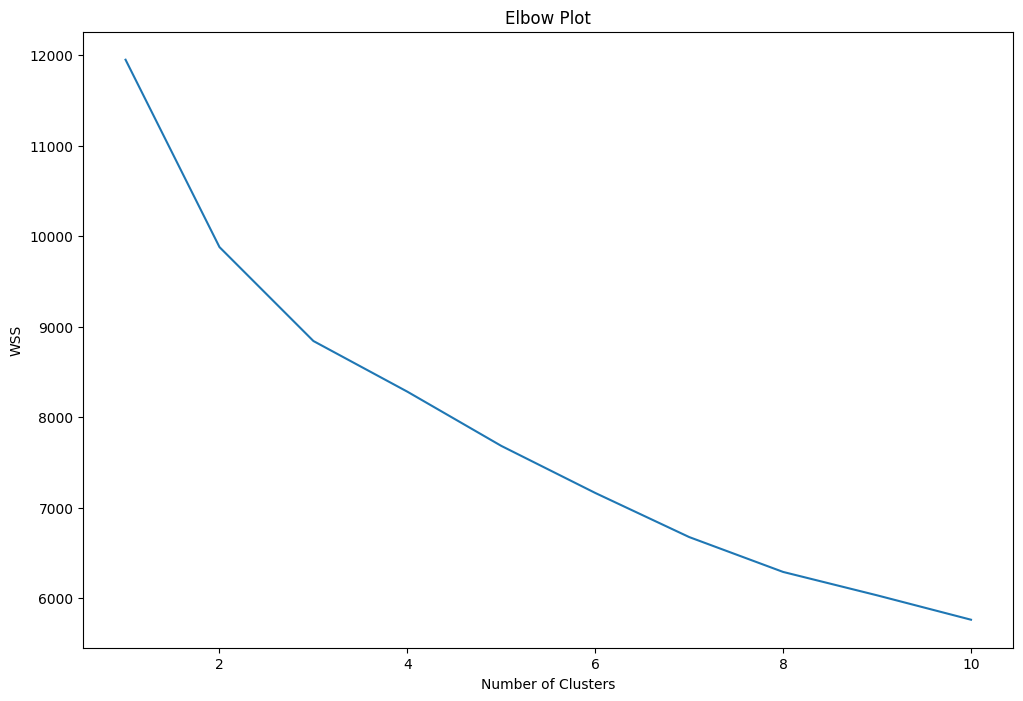

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
cluster,,,,,,,,,,,,,,,,,,,
0,1.362894e+06,3.843750,20.312500,13.406250,0.968750,13.281250,0.031250,1.375000,2.281250,7.906250,16.500000,9.437500,7.250000,25.937500,18.937022,297.890312,2677.190000,1881.646250,2179.322813
1,1.362994e+06,2.734568,25.592593,19.802469,0.012346,1.234568,0.000000,2.858025,3.111111,10.154321,23.222222,6.925926,12.438272,43.796296,12.389730,107.948086,24.535679,-4189.520926,-4081.738951
2,1.362970e+06,1.373626,12.049451,5.043956,0.000000,1.538462,0.192308,0.521978,0.857143,9.609890,4.675824,4.543956,1.945055,5.236264,20.808792,57.343352,501.764176,64.818407,122.041099
3,1.362977e+06,1.118644,10.508475,10.423729,0.000000,2.525424,0.000000,9.694915,2.627119,19.610169,13.135593,6.237288,6.271186,24.762712,33.141580,67.687288,1066.594746,-1239.390169,-1171.914915
4,1.363020e+06,3.091703,21.257642,18.371179,0.000000,21.720524,0.161572,1.397380,2.663755,7.995633,21.703057,7.187773,9.668122,33.537118,14.201198,77.409170,332.804629,47.324105,124.557598


In [148]:
# Extract the variables for clustering
X = transactions.iloc[:, 1:20].values

# Normalize the variables to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

# Apply KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
transactions['cluster'] = y_kmeans

# Analyze the clusters
transactions.groupby('cluster').mean()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


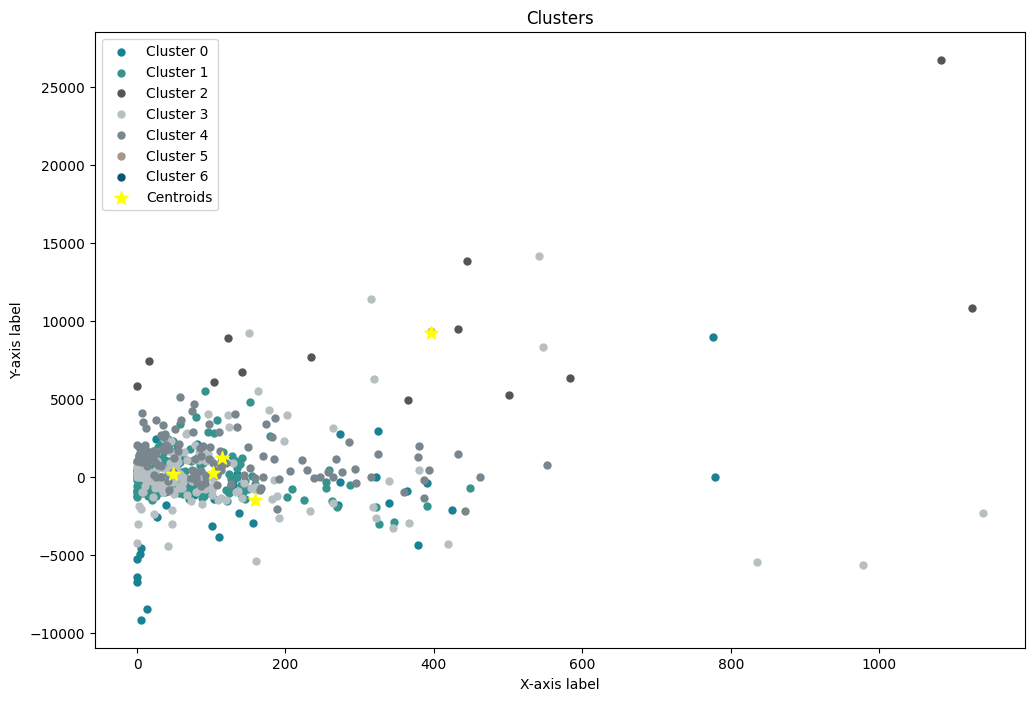

In [177]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the colors for the clusters
colors = ['#188193', '#35948e', '#555653', '#b7bfc3', '#79868d', '#a5978a', '#075773']

# Fit the KMeans model
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters
for i in range(len(colors)):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], s=25, c=colors[i], label='Cluster '+str(i))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', marker='*', label='Centroids')
plt.title('Clusters')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.show()


#### No Clear Clusters, trying to plot using Hierachal method

# Hierarchal Clustering

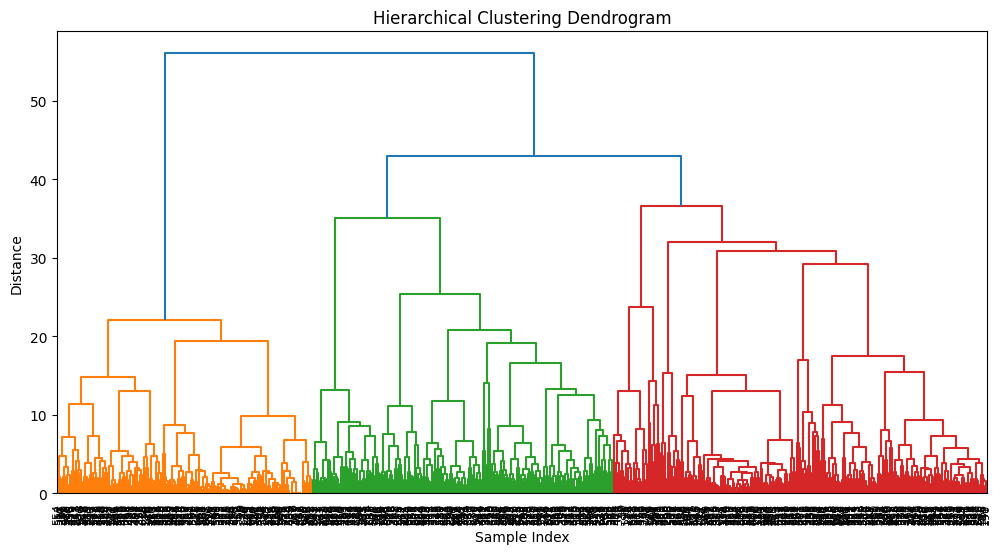

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract the variables for clustering
X = transactions.iloc[:, 1:20].values

# Normalize the variables to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Perform hierarchical clustering using Ward's method
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()


In [184]:
from sklearn.cluster import AgglomerativeClustering

# create an instance of the AgglomerativeClustering class and fit the model
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[0 2 0 1 2 0 0 2 1 1 1 1 1 1 1 0 0 1 0 2 0 0 0 2 1 1 0 1 1 0 0 2 0 2 2 0 1
 2 0 0 2 1 2 1 1 0 0 0 0 2 2 0 2 2 1 2 2 1 0 0 0 1 0 2 0 2 0 0 0 2 0 1 2 2
 0 2 0 0 1 2 0 0 1 2 2 0 2 1 1 1 1 1 2 2 2 0 1 1 0 2 2 2 2 2 0 0 1 2 0 1 1
 0 0 1 2 0 1 1 0 1 1 1 2 0 2 1 1 1 1 2 1 0 2 2 0 0 1 2 0 0 1 0 2 2 2 2 2 0
 2 1 0 2 2 0 0 0 1 1 2 1 1 0 1 2 0 0 0 1 0 1 2 2 2 1 2 2 0 0 2 1 0 2 2 0 0
 2 0 0 2 0 0 2 1 0 0 2 1 0 0 0 0 0 2 1 2 2 1 1 1 2 0 0 2 2 2 2 0 2 2 0 2 2
 2 0 0 2 1 2 1 0 0 2 2 1 0 2 1 2 2 0 0 1 0 2 2 0 2 0 2 0 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 0 1 2 0 0 1 0 1 1 2 1 0 0 2 0 1 2 2 2 1 2 0 0 1 2 0 0 1 0 2 0
 1 0 0 1 2 2 1 1 2 1 0 2 2 0 0 0 0 0 0 0 1 0 1 2 1 0 1 2 0 2 2 1 0 1 2 0 2
 2 0 0 0 2 0 0 1 2 0 1 0 2 1 0 1 1 1 2 0 1 1 0 1 0 1 2 2 0 1 2 1 2 1 0 1 2
 1 1 2 2 2 1 0 1 0 1 2 2 1 0 0 1 1 2 0 2 1 0 0 1 1 0 0 0 1 2 2 2 1 1 0 1 0
 0 2 1 1 1 2 2 1 1 2 0 2 1 1 0 2 0 0 0 1 0 1 0 2 2 0 1 2 0 0 2 2 0 2 2 0 0
 1 0 0 1 1 2 1 2 0 0 0 1 1 0 0 2 2 0 1 0 1 1 1 1 0 0 0 0 0 1 2 0 0 2 2 2 0
 2 2 0 1 0 1 2 0 0 2 2 1 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


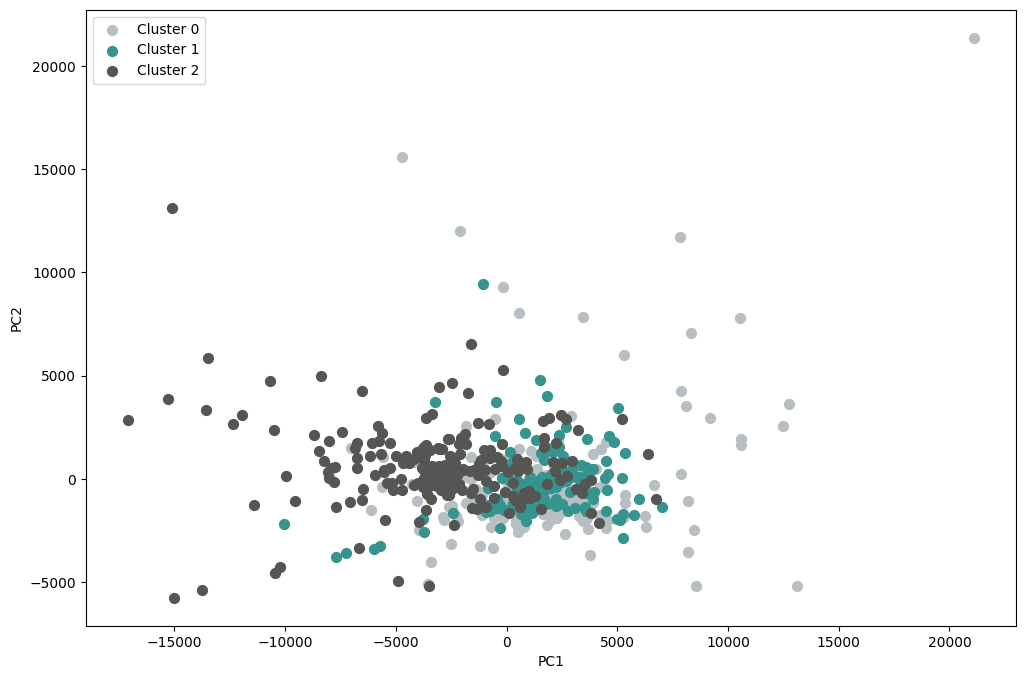

In [228]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the colors for the clusters
colors = ['#b7bfc3', '#35948e', '#555653']

# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(X)

# Transform your data using the fitted PCA model
X_pca = pca.transform(X)

# Plot the transformed data with colors
for i in range(len(colors)):
    plt.scatter(X_pca[y_hc==i, 0], X_pca[y_hc==i, 1], s=50, c=colors[i], label='Cluster '+str(i))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


## Clustering using KM looking at lower, middle and upper class

In [196]:
from sklearn.cluster import KMeans
import numpy as np

# Define income ranges for upper-class, middle-class, and lower-class
upper_class = (100000, np.inf)
middle_class = (50000, 100000)
lower_class = (0, 50000)

# select the last 4 rows and columns 15 to 18
X = transactions.iloc[-4:, 15:19]

# Initialize cluster centers manually
cluster_centers = np.array([
    [(upper_class[0] + upper_class[1]) / 2],
    [(middle_class[0] + middle_class[1]) / 2],
    [(lower_class[0] + lower_class[1]) / 2]
])

# Fit KMeans model with 3 clusters and custom cluster centers
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## KMeans clustering on transactions using KMeans++ initialization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


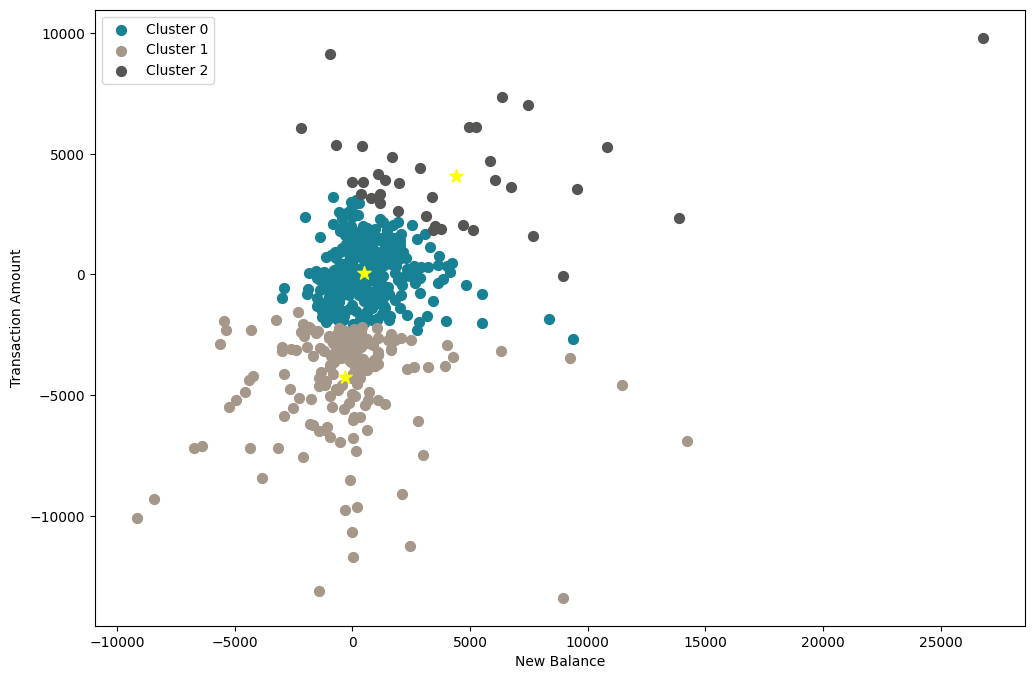

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract relevant columns
X = transactions[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Fit KMeans model with 3 clusters and kmeans++ initialization
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot the data points with cluster colors and centroid markers
colors = ['#188193', '#a5978a', '#555653', '#b7bfc3', '#79868d', '#35948e', '#075773']
for i in range(3):
    plt.scatter(X[cluster_labels==i]['new_balance'], X[cluster_labels==i]['tran_amt'], s=50, c=colors[i], marker='o', label='Cluster '+str(i))
    plt.scatter(kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 3], s=100, c='yellow', marker='*')

plt.xlabel('New Balance')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()


In [207]:
cluster_0_means = transactions[cluster_labels == 0].mean()
cluster_1_means = transactions[cluster_labels == 1].mean()
cluster_2_means = transactions[cluster_labels == 2].mean()

means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means])
means


,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
0,1.362994e+06,2.485327,16.990971,12.884876,0.047404,11.399549,0.153499,1.884876,2.083521,9.593679,14.747178,6.300226,6.534989,22.494357,18.672419,64.178465,493.649323,-4.665756,59.351196
1,1.362983e+06,2.302703,22.918919,16.756757,0.016216,2.951351,0.027027,3.351351,2.681081,10.594595,20.767568,6.324324,11.037838,38.718919,13.880281,114.688378,-310.591081,-4347.076162,-4232.542973
2,1.362976e+06,1.750000,19.722222,15.805556,0.250000,12.000000,0.000000,1.083333,2.194444,11.805556,14.194444,8.444444,6.888889,24.750000,21.333751,264.678056,4413.333056,3813.790556,4078.241111


## DBSCAN

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_95623/2309772916.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['new_balance_bin'] = pd.qcut(X['new_balance'], q=3, labels=['Low', 'Medium', 'High'])
/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_95623/2309772916.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = dbscan.fit_predict(X[['tran_amt', 'new_balance']])


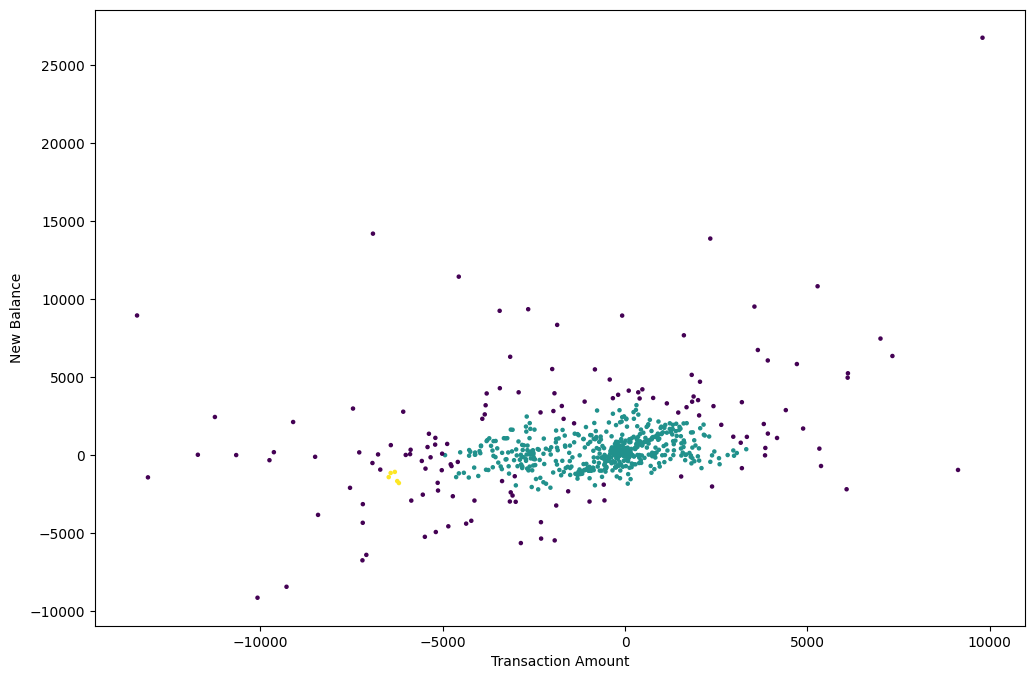

In [235]:
import pandas as pd
from sklearn.cluster import DBSCAN


# Select relevant columns
X = transactions[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Create 3 bins based on new balance values
X['new_balance_bin'] = pd.qcut(X['new_balance'], q=3, labels=['Low', 'Medium', 'High'])

# Apply DBSCAN clustering to the data
dbscan = DBSCAN(eps=500, min_samples=5)
X['label'] = dbscan.fit_predict(X[['tran_amt', 'new_balance']])

# Visualize the clusters
plt.scatter(X['tran_amt'], X['new_balance'], c=X['label'], s=5)
plt.xlabel('Transaction Amount')
plt.ylabel('New Balance')
plt.show()


## Britt Clusters
* Combine Principle, interest, new balance, and other like columns together for overall cluster
* Drop acc end date, drop Nan Rows, drop channels


## Stretch
##### See what the clusters look like when looking at demographics and transactions